## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [74]:
data.shape[0] #смотрим сколько всего строк в датасете

344

In [76]:
data.info() #выводим информацию по числу ненулевых значений для всех признаков, видим, что в 7 случаях есть пропуски, удалим их

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Clutch Completion    344 non-null    object 
 3   Date Egg             344 non-null    int64  
 4   Culmen Length (mm)   342 non-null    float64
 5   Culmen Depth (mm)    342 non-null    float64
 6   Flipper Length (mm)  342 non-null    float64
 7   Body Mass (g)        342 non-null    float64
 8   Sex                  334 non-null    object 
 9   Delta 15 N (o/oo)    330 non-null    float64
 10  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), int64(1), object(4)
memory usage: 29.7+ KB


In [78]:
data.isna().sum() #максимальное число пропусков наблюдается  для признака "Delta 15 N (o/oo)"

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [80]:
data = data.dropna()

In [82]:
data.shape #теперь в датасете 325 строк

(325, 11)

Всего у нас 3 категориальных признака, не считая целевую переменную: пол особи, остров, завершенность кладки яиц.

Пол и остров закодирую через onehot-кодирование, так как упорядочить значения в определённую иерархию невозможна.

Значения Yes завершенности кладки преобразую в 1, а No в 0, так как значения эквивалентны True и False, и логический тип здесь хорошо подойдёт.

Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [86]:
data2 = data.copy()
data["Clutch Completion"] = data2["Clutch Completion"].apply(lambda x: 1 if x == "Yes" else 0)
data

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,1,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,1,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,1,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,1,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,1,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,1,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,Torgersen,1,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,Biscoe,1,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,Biscoe,1,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


In [88]:
sx = pd.get_dummies(data["Sex"])
sx

,.,FEMALE,MALE
0,False,False,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
339,False,True,False
340,False,False,True
341,False,True,False
342,False,True,False


Тут вдруг выяснилось, что пол может принимать значение ".", что тоже своего рода пропуск. Поэтому нужно убрать из датасета все строки с таким значением пола.

In [91]:
data[data["Sex"] == "."] #такая строчка всего одна

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
41,Gentoo,Biscoe,1,0,44.5,15.7,217.0,4875.0,.,8.04111,-26.18444


In [93]:
data = data[data["Sex"] != "."]
data #теперь у нас 324 строки

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,1,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,1,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,1,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,1,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,1,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,1,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,Torgersen,1,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,Biscoe,1,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,Biscoe,1,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


In [95]:
isls = pd.get_dummies(data["Island"])
sx = pd.get_dummies(data["Sex"])
sx #теперь всё норм, можно объединять датасеты

,FEMALE,MALE
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
339,True,False
340,False,True
341,True,False
342,True,False


In [97]:
data = pd.concat([data,sx, isls], axis=1).drop(columns=["Sex", "Island"]) #объединяем сразу три датасета, лишние строки отбрасываем
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),FEMALE,MALE,Biscoe,Dream,Torgersen
0,Chinstrap,1,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,True,False
1,Chinstrap,1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,False,True,False
2,Gentoo,1,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,True,False,True,False,False
3,Chinstrap,1,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,False,True,False
4,Gentoo,1,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,1,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,False,True,False
340,Adelie,1,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,False,False,True
341,Adelie,1,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,True,False,True,False,False
342,Gentoo,1,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,True,False,True,False,False


Теперь кодируем целевую переменную:

In [100]:
def peng_coder(x):
    if x == "Chinstrap":
        return 0
    elif x == "Gentoo":
        return 1
    else:
        return 2

data["Species"] = data2["Species"].apply(peng_coder)
data

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),FEMALE,MALE,Biscoe,Dream,Torgersen
0,0,1,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,False,True,False,True,False
1,0,1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,False,True,False
2,1,1,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,True,False,True,False,False
3,0,1,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,False,True,False
4,1,1,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,1,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,False,True,False
340,2,1,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,False,False,True
341,2,1,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,True,False,True,False,False
342,1,1,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,True,False,True,False,False


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

<Axes: xlabel='Species'>

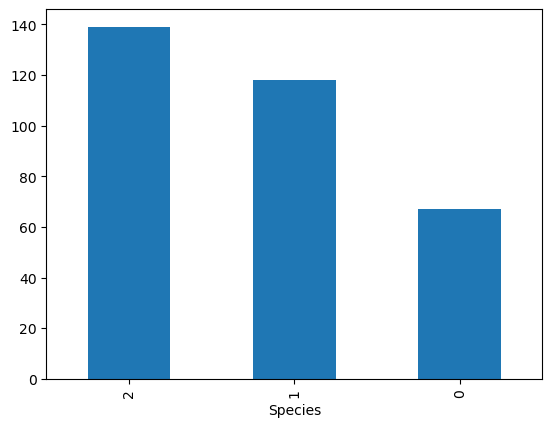

In [103]:
data["Species"].value_counts().plot(kind="bar") #смотрим на баланс классов

In [105]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'Species']
y = data["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Stratify важно применять, чтобы соблюдался баланс классов на тестовой и тренировочной выборках. В свою очередь, баланс нужно соблюдать, чтобы тест как выборка хорошо отражал баланс генеральной совокупности, то есть был в достаточной мере репрезентативным, и не было ситуации, когда какой-то из классов представлен недостаточно. 

Выше можно увидеть распределение классов в датасете, его я и передал в параметр stratify.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = X_train[["Flipper Length (mm)", "Body Mass (g)"]] #оставляем по два признака на трейне и тесте
X_test = X_test[["Flipper Length (mm)", "Body Mass (g)"]]

scaler.fit(X_train)
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

md1 = KNeighborsClassifier(n_neighbors=1, p=2)
md1.fit(X_train_scl, y_train)
y_pred1_test = md1.predict(X_test_scl)
y_pred1_train = md1.predict(X_train_scl)
acc1_test = accuracy_score(y_test, y_pred1_test)
acc1_train = accuracy_score(y_train, y_pred1_train)
acc1 = (acc1_train, acc1_test)

md3 = KNeighborsClassifier(n_neighbors=3, p=2)
md3.fit(X_train_scl, y_train)
y_pred3_test = md3.predict(X_test_scl)
y_pred3_train = md3.predict(X_train_scl)
acc3_test = accuracy_score(y_test, y_pred3_test)
acc3_train = accuracy_score(y_train, y_pred3_train)
acc3 = (acc3_train, acc3_test)

md5 = KNeighborsClassifier(n_neighbors=5, p=2)
md5.fit(X_train_scl, y_train)
y_pred5_test = md5.predict(X_test_scl)
y_pred5_train = md5.predict(X_train_scl)
acc5_test = accuracy_score(y_test, y_pred5_test)
acc5_train = accuracy_score(y_train, y_pred5_train)
acc5 = (acc5_train, acc5_test)

md10 = KNeighborsClassifier(n_neighbors=10, p=2)
md10.fit(X_train_scl, y_train)
y_pred10_test = md10.predict(X_test_scl)
y_pred10_train = md10.predict(X_train_scl)
acc10_test = accuracy_score(y_test, y_pred10_test)
acc10_train = accuracy_score(y_train, y_pred10_train)
acc10 = (acc10_train, acc10_test)

md15 = KNeighborsClassifier(n_neighbors=15, p=2)
md15.fit(X_train_scl, y_train)
y_pred15_test = md15.predict(X_test_scl)
y_pred15_train = md15.predict(X_train_scl)
acc15_test = accuracy_score(y_test, y_pred15_test)
acc15_train = accuracy_score(y_train, y_pred15_train)
acc15 = (acc15_train, acc15_test)

md25 = KNeighborsClassifier(n_neighbors=25, p=2)
md25.fit(X_train_scl, y_train)
y_pred25_test = md25.predict(X_test_scl)
y_pred25_train = md25.predict(X_train_scl)
acc25_test = accuracy_score(y_test, y_pred25_test)
acc25_train = accuracy_score(y_train, y_pred25_train)
acc25 = (acc25_train, acc25_test)

accs = { "NN": [1,3,5,10,15,25], "Train": [acc1[0], acc3[0], acc5[0], acc10[0], acc15[0], acc25[0]], "Test": [acc1[1], acc3[1], acc5[1], acc10[1], acc15[1], acc25[1]]}

accs = pd.DataFrame(accs)
accs

,NN,Train,Test
0,1,0.969027,0.765306
1,3,0.858407,0.744898
2,5,0.827434,0.775510
3,10,0.827434,0.775510
4,15,0.809735,0.755102
5,25,0.792035,0.836735


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [114]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [49]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

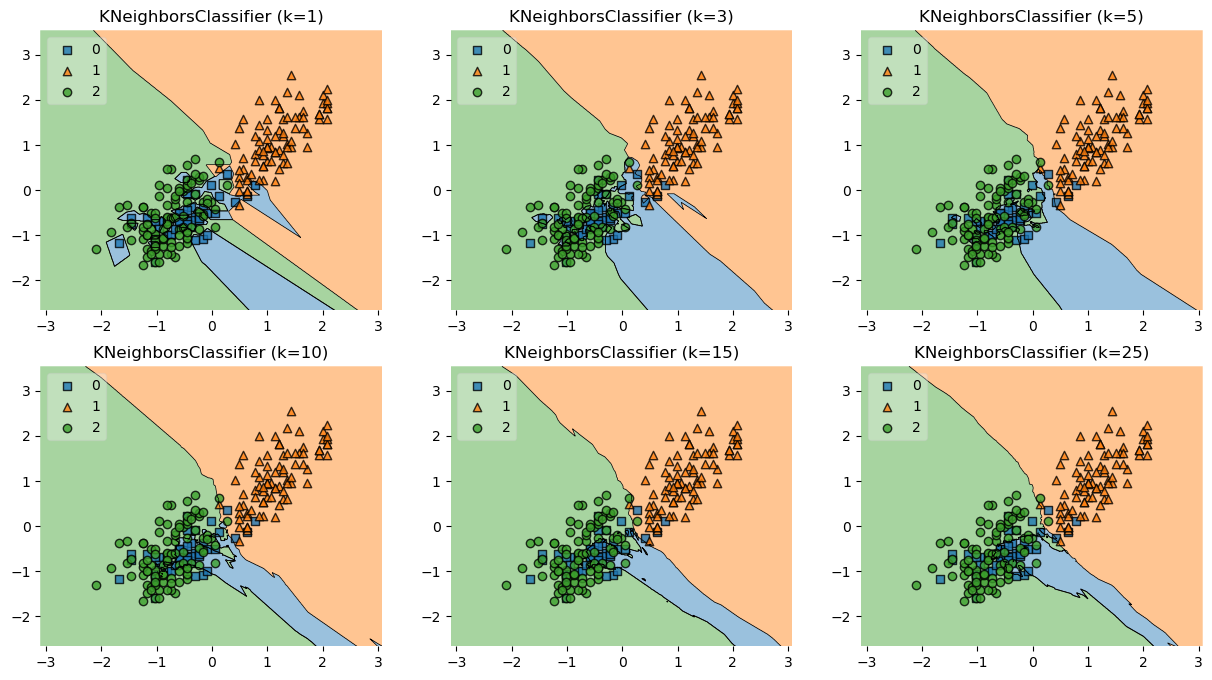

In [476]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

labels = ['KNeighborsClassifier (k=1)', 'KNeighborsClassifier (k=3)', 'KNeighborsClassifier (k=5)', 'KNeighborsClassifier (k=10)', 'KNeighborsClassifier (k=15)', 'KNeighborsClassifier (k=25)']

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,8))

for clf, lab, grd in zip([md1, md3, md5, md10, md15, md25],
                         labels,
                         itertools.product(range(2),
                         range(3))):
    clf.fit(X_train_scl, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scl, y=y_train.values,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Наивысшая доля верных ответов, судя по значению accuracy, наблюдается на 5 и 10 соседях. На них модель стала уже более чётко разделять пространство на 3 разноцветные части, не допуская проникновения синих участков внутрь оранжевых или зелёных. Поэтому именно на них лучше обучать модель.

На 1 соседе ожидаемо имеем очень высокую accuracy для тренировочной выборки и низкую для тестовой, т.к за исключением некоторых наблюдений (из-за которых доля не 100%) прогноз падает на точки, по которым модель изначально обучилась. Видно это и на первом графике решающей поверхности, где разноцветные участки принимают более причудливые формы, так как привязаны к классам конкретных точек, а не обобщают значения некоторой группы объектов. Именно этот график показывает переобученную модель, ведь видны некоторые синие участки, вставленные посреди оранжевых или зелёных областей и ломающие визуально понятные закономерности. Всё это как раз-таки происходит, из-за того что модель идеально подогнана под тренировочные данные, но плохо обобщает тестовые.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

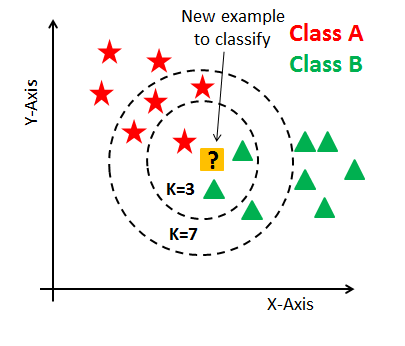

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [117]:
import numpy as np
from collections import Counter
from numpy import linalg as LA


class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_tr = X
        self.y_tr = y

    
    def count_distance(self, x, y):
        dist = np.array([0.0] * len(y))
        for i in range(len(y)):
            dist[i] = LA.norm(y[i] - x)
        return dist
            
    def predict(self, X):
        y_tst = []
        for i in range(len(X)):
            dists = KNN.count_distance(self, X[i], self.X_tr) #расстояние от точки до всех остальных
            neighbours = np.argsort(dists) #номера соседей из X_train от ближайшего к дальнему
            closest_neighbours = neighbours[:self.k] #смотрим только на нужное число соседей
            classes_of_neighbours = self.y_tr[closest_neighbours] #массив из классов соседей
            
            uniques, cnt = np.unique(classes_of_neighbours, return_counts=True) #достаём все уникальные значения классов и их частоты
            the_closest_class = np.argmax(cnt) #выбираем индекс класса с наибольшей частотой
            y_tst.append(uniques[the_closest_class]) #по индексу достаём само название класса и добавляем в вектор ответов
   
        
        return np.array(y_tst)


In [119]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [121]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [195]:
res_KNN = []
indx = []
for i in [1, 3, 17, 27, 61, 101]:
    md_KNN = KNN(k=i)
    md_KNN.fit(X_train_scl, np.array(y_train))
    y_pred_KNN = md_KNN.predict(X_test_scl)
    acc_KNN = accuracy_score(np.array(y_test), y_pred_KNN)
    res_KNN.append(acc_KNN)
    indx.append(i)

pd.DataFrame(res_KNN, index=indx)

,0
1,0.765306
3,0.755102
17,0.775510
27,0.867347
61,0.775510
101,0.775510


In [ ]:
Наивысший результат accuracy составляет 0.86 и достигается при k=27

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [6]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [10]:
data.shape[0]

53940

In [12]:
data.info() #пропусков данных нет, везде по 53940 значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


А вот колонка Unnamed бесполезна, так как выполняет роль индекса, который мы сможем достать и без неё. Удалим Unnamed:

In [15]:
data = data.drop(columns = "Unnamed: 0")
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [18]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Среди корреляций вещественнх признаков с целевой переменной price можно выделить четыре самые сильные. Во-первых, это вес бриллианта (carat), с ним связь положительная, она составляет 0.92. Так же значительны корреляции цены с длиной, шириной и глубиной/высотой бриллианта (x, y, z, соответственно). Причём чем больше один из этих показателей, тем в среднем больше и цена (корреляция равна 0.86 - 0.88 в зависимости от признака)

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

Посмотрим на количество значений каждого категориального признака:

In [23]:
print("cut:", data["cut"].nunique())
print("clarity:", data["clarity"].nunique())
print("color:", data["color"].nunique())

cut: 5
clarity: 8
color: 7


 Учитывая то, что в информации о датасете указан порядок для всех этих признаков, могу предположить, что можно было бы закодировать их значениями от 1 до n, но раз задание поставлено иначе, отклоняться от него не буду, тем более, что значений у каждого из признаков не более 8 и слишком громоздким датафрейм не станет.

In [26]:
ct = pd.get_dummies(data["cut"])
col = pd.get_dummies(data["color"])
clar = pd.get_dummies(data["clarity"])
data = pd.concat([data,ct, col, clar], axis=1).drop(columns=["cut", "color", "clarity"])
data

,carat,depth,table,price,x,y,z,Fair,Good,Ideal,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


Теперь в датасете 27 колонок

**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [30]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'price']
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()

scaler2.fit(X_train[["carat", "depth", "table", "x", "y", "z"]])
X_train_tran = scaler2.transform(X_train[["carat", "depth", "table", "x", "y", "z"]])
X_test_tran = scaler2.transform(X_test[["carat", "depth", "table", "x", "y", "z"]])


X_train_numb = pd.DataFrame(X_train_tran) #приобразовал в датафрейм
X_train_numb.columns = ['carat','depth','table','x','y','z'] #переименовал колонки обратно
X_train_reset = X_train.reset_index(drop=True) #индексы в X_train остались от прошлого датасета, из-за чего не мог переприсвоить объектом стандартизированные значения
X_train_reset[['carat','depth','table','x','y','z']] = X_train_numb[['carat','depth','table','x','y','z']] #переприсваиваем
X_train_scaled = X_train_reset #меняем обозначение, чтобы была понятна суть датафрейма

X_test_numb = pd.DataFrame(X_test_tran) #далее провернул те же действия со тестом
X_test_numb.columns = ['carat','depth','table','x','y','z']
X_test_reset = X_test.reset_index(drop=True)
X_test_reset[['carat','depth','table','x','y','z']] = X_test_numb[['carat','depth','table','x','y','z']]
X_test_scaled = X_test_reset

X_test_scaled #как итог выведу стандартизированнй тестовый датафрейм

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,-1.177087,0.248547,-0.656213,-1.573073,-1.516519,-1.505623,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,-0.462124,-1.221412,-0.207099,-0.263201,-0.278064,-0.395190,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.840634,0.248547,-1.105327,-0.869128,-0.871127,-0.830930,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.777549,-0.661428,-0.207099,-0.726557,-0.740304,-0.788761,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,1.577621,0.388543,-1.105327,1.518937,1.422631,1.502385,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,-0.819606,-0.381435,0.691128,-0.851307,-0.801355,-0.844986,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
16178,0.547234,0.878529,-1.105327,0.672421,0.611531,0.757411,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
16179,1.493508,-0.661428,1.140242,1.501116,1.431353,1.347768,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
16180,-0.188756,-1.991391,1.589356,0.057584,0.140569,-0.142180,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Теперь все наши признаки вещественные имеют единый масштаб, так как приведены к стандартному нормальному распределению. Если раньше веса интерпретировать было проблематично в связи с разными единицами измерения, то теперь, если вес первого признака будет по модулю больше второго, то можно будет утверждать, что первый признак сильнее влияет на прогноз, выдаваемыый моделью. Категориальные масштабировать не нужно, ведь тогда подход "0 - отсутствует, 1 - присутствует" уже выполняться не будет.

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

y_train_reset = y_train.reset_index(drop=True) #на всякий случай, индексы Y тоже переприсвоил
y_test_reset = y_test.reset_index(drop=True)

md_linreg = LinearRegression().fit(X_train_scaled, y_train_reset) #строим регрессию на тренировочной
y_train_pred = md_linreg.predict(X_train_scaled) #предсказываем

print('MSE на тренировочной', mean_squared_error(y_train_reset, y_train_pred)) #выводим MSE

y_test_pred = md_linreg.predict(X_test_scaled) #предсказываем

print('MSE на тестовой', mean_squared_error(y_test_reset, y_test_pred)) #выводим MSE

MSE на тренировочной 1290541.9147450614
MSE на тестовой 1244765.4357158693


<Axes: >

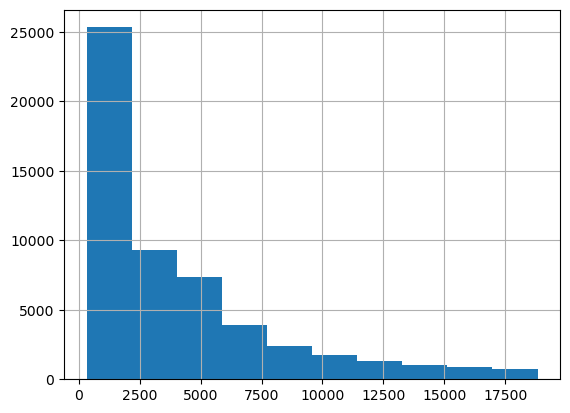

In [41]:
y.hist()

Вообше MSE получился большой, но держим в голове, что это квадрат. Если брать корень из MSE для теста и трейна, получим числа около 1100, что значительно для многих наблюдений в датасете (см. график частот), но для больших значений, к примеру максимального в нашем датасете 18823, ошибка уже будет менее весомой

**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [45]:
pd.DataFrame(md_linreg.coef_).apply(lambda s: s.apply('{0:.5f}'.format)) [:6] 

,0
0,5338.61567
1,-90.17382
2,-60.33228
3,-1100.41885
4,-6.45892
5,-34.25894


Выше я преобразовал полученные коэффициенты в датафрейм, чтобы затем привести их к привычному для восприятия виду (вывел только веса вещественных). Можно заметить, что наибольшие веса соответствуют признакам "carat" (5338.6) и "x" (-1100.42), то есть вес и длина, соответственно. Эти признаки не только сильно коррелируют с целевой переменной, но и друг с другом, и с признаками "y", "z".

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

lasso = Lasso(10).fit(X_train_scaled, y_train_reset)
pd.DataFrame(lasso.coef_).apply(lambda s: s.apply('{0:.5f}'.format)) [:6] 

,0
0,4853.40740
1,-100.46514
2,-80.37216
3,-696.79433
4,-0.00000
5,-32.59994


In [53]:
lr = Ridge(10).fit(X_train_scaled, y_train_reset)
pd.DataFrame(lr.coef_).apply(lambda s: s.apply('{0:.5f}'.format)) [:6] 

,0
0,5298.92672
1,-88.82285
2,-60.80455
3,-1058.74512
4,-9.05173
5,-37.40525


Lasso помогла значительно снизить по модулю веса признака "x" (с - 1100 до -696) и признака "carat", однако вес второго в относительном выражении изменился куда меньше. При этом регуляризация привела к колоссальному падению веса признака "y" чуть ли не до нуля.

Ridge тоже привела к снижению весов, но гораздо менее заметному, чем в случае с Lasso: на 40 по модулю упал вес "carat" и на 42 вес признака "x".
В целом, хоть аномальные веса двух признаков снизились (в разной степени в зависимости от вида регрессии), благодаря регуляризации, но они всё ещё слишком велики относительно значений весов для других признаков.

И в изначальной, и в полученной регрессии проблема мультиколлинеарности сильно проявляется, так как есть сразу несколько признаков, сильно коррелирующих друг с другом и с целевой переменной, поэтому модель не знает как между ними вообще распределить веса, из-за чего и наблюдается большая разница в них

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\79199\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Euclidean norm dynamics with the change of alpha')

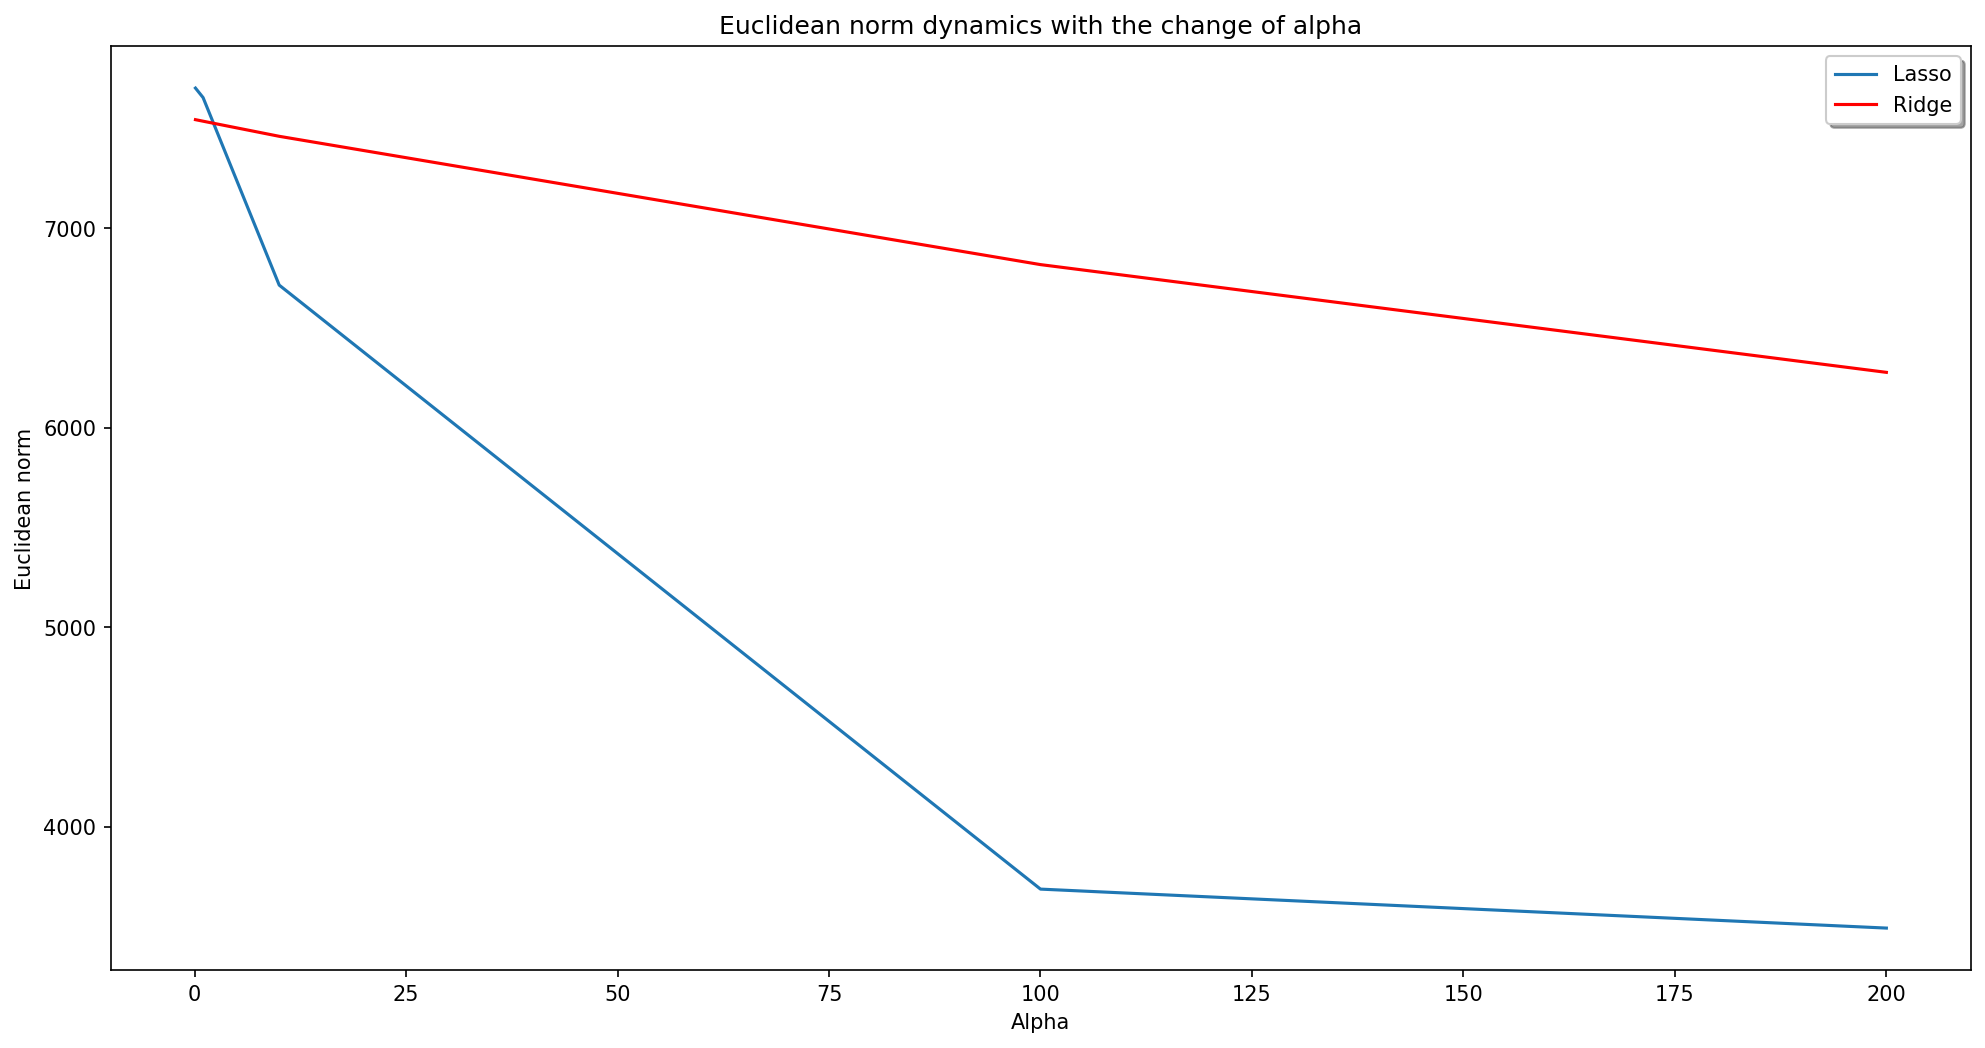

In [55]:
las1 = Lasso(0.1).fit(X_train_scaled, y_train_reset)
las2 = Lasso(1).fit(X_train_scaled, y_train_reset)
las3 = Lasso(10).fit(X_train_scaled, y_train_reset)
las4 = Lasso(100).fit(X_train_scaled, y_train_reset)
las5 = Lasso(200).fit(X_train_scaled, y_train_reset)

rid1 = Ridge(0.1).fit(X_train_scaled, y_train_reset)
rid2 = Ridge(1).fit(X_train_scaled, y_train_reset)
rid3 = Ridge(10).fit(X_train_scaled, y_train_reset)
rid4 = Ridge(100).fit(X_train_scaled, y_train_reset)
rid5 = Ridge(200).fit(X_train_scaled, y_train_reset)

df = {"Lasso": [np.linalg.norm(las1.coef_), np.linalg.norm(las2.coef_), np.linalg.norm(las3.coef_), np.linalg.norm(las4.coef_), np.linalg.norm(las5.coef_)], "Ridge":
[np.linalg.norm(rid1.coef_), np.linalg.norm(rid2.coef_), np.linalg.norm(rid3.coef_), np.linalg.norm(rid4.coef_), np.linalg.norm(rid5.coef_)], "alpha": [0.1, 1, 10, 100, 200]}
df = pd.DataFrame(df)

plt.figure(figsize=(16, 8), dpi=150)
plt.plot(df['alpha'], df['Lasso'])
plt.plot(df['alpha'], df['Ridge'], color="red")

plt.xlabel("Alpha")
plt.ylabel("Euclidean norm")
plt.legend(("Lasso", "Ridge"), loc='upper right', shadow=True)
plt.title("Euclidean norm dynamics with the change of alpha")

По графику видно, что Lasso с наращиванием альфы будет куда сильнее снижать евклидову норму весов (т.е в целом сами веса), нежели Ridge. Также Lasso хорошо подходит для отбора признаков в связи с тем, что она обнуляет некоторые веса и этим явно указывает на лишние признаки. Ridge же просто снижает веса, но до обнуления не доводит. Полагаю, дело в разнице функции, используемой для штрафа: в Lasso это модуль, а в Ridge квадрат, т.е пока Ridge штрафует за квадраты весов, Lasso штрафует за абсолютные значения весов.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [57]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

al = [0.1, 1, 10, 100, 200]

las_CV = LassoCV(cv=5, alphas = al).fit(X_train_scaled, y_train_reset)
print("Наименьшее MSE наблюдается на alpha =", al[np.argmin(np.mean(las_CV.mse_path_, axis=1))])

Наименьшее MSE наблюдается на alpha = 100


C:\Users\79199\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511839176.03318787, tolerance: 48476565.46527788
  model = cd_fast.enet_coordinate_descent_gram(


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [59]:
las_best = Lasso(100).fit(X_train_scaled, y_train_reset)
pd.DataFrame(las_best.coef_, index=X_train_scaled.columns)

,0
carat,3653.983129
depth,-56.094089
table,-57.380325
x,0.000000
y,0.000000
z,0.000000
Fair,-0.000000
Good,-0.000000
Ideal,0.000000
Premium,-0.000000


Обнулены были практически все признаки, кроме:

1) Вес бриллианта ('carat'). По корреляционной таблице уже было видно, что признак сильнее всего связан со значением целевой переменной, поэтому он не только не был занулён, но и имеет огромный вес 3654, значит, признак наиболее информативен среди всех.

2) Отношение ширины вершины бриллианта к максимальной ширине ('table') и значение дроби 2 * z / (x + y) ('depth'). Эти признаки не так влияют на итоговый результат, поэтому их веса в разы меньше, чем у 'carat', однако всё же сколько-то информативны.

3) Наличие у бриллианта степени чистоты SI2, одно из значений признака clarity. Полагаю, его большой вес обобщает влияние признаков clarity, color, cut на значение целевой переменной, так как регуляризация занулила все остальные категориальные признаки.

Почему x, y, z остались с нулевыми весами? Я считаю, что это как раз-таки итог устранения мультиколлинеарности, ведь они несли примерно ту же информацию, что и carat, а значит нет никакой необходимости включать их в модель. Если рассуждать об этом в тематике датасета, можно утверждать, что с ростом размера бриллианта в ту или иную сторону непременно увеличивался его вес. Также, судя по всему, в датасете нет длинных, но тонких, или же низких, но чрезвычайно широких бриллиантов, так как рост x сопровождался ростом y и z (об этом говорит высокая корреляция между всеми тремя признаками), и имея информацию об x, наше предположение о цене не изменилось бы при добавлении y и z в рассмотрение. Так что x,y,z неинформативны.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [61]:
y_test_pred_best = las_best.predict(X_test_scaled) #предсказываем



print('MSE на тестовой раньше', mean_squared_error(y_test_reset, y_test_pred))
print('MSE на тестовой сейчас', mean_squared_error(y_test_reset, y_test_pred_best))

MSE на тестовой раньше 1244765.4357158693
MSE на тестовой сейчас 2190646.4539244208


Значение MSE увеличилось, значит, модель стала хуже после применения к ней Lasso-регрессии. Возможно, это связано с чрезмерным упрощением модели из-за применения регуляризации. Многие коэффициенты занулились, однако, видимо, хотя бы небольшое число новой информации они всё-таки вносили. Также это может быть вызвано странностью распределения весов между категориальными признаками, ведь все они занулились, кроме SI2, что предполагает влияние на итоговый результат частоты появления одного значения лишь одного категориального признака. Возможно, использование порядкового кодирования ситуацию бы смогло улучшить.

В пример об упрощении могут привести признаки y, z, корреляцию которых с price ниже, чем у признака carat на 0.06, но модель пересатала учитывать эту разницу. Такая жек ситуация и с признаком table, чья низкая корреляция заставила модель вообще не учитывать этот признак при рассмотрении, и из-за всех подобных упрощений качество модели упало. Однако стоит сказать, что абсолютная ошибка изменилась примерно от 1100 до 1500, что кажется менее черьёзным изменением, чем значения MSE, растущие по квадратичной функции